[![open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1g3CTgBOvXZdn7zkpeD3xNeo06K0CXOjB?usp=sharing)

# Detect Overfitting and Underfitting with Learning Curves

For this quiz, we'll be using three models to train the circular dataset below.

- A Decision Tree model,
- A Logistic Regression model, and
- A Support Vector Machine model.

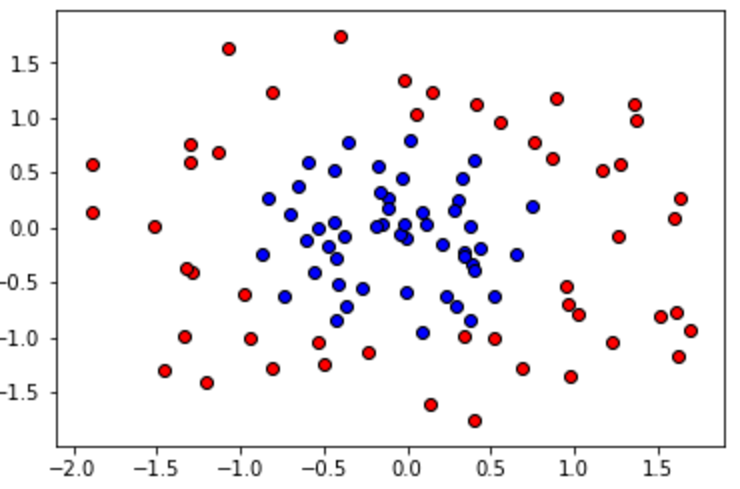

One of the models overfits, one underfits, and the other one is just right. First, we'll write some code to draw the learning curves for each model, and finally we'll look at the learning curves to decide which model is which.

First, let's remember that the way the curves look for the three models, is as follows:

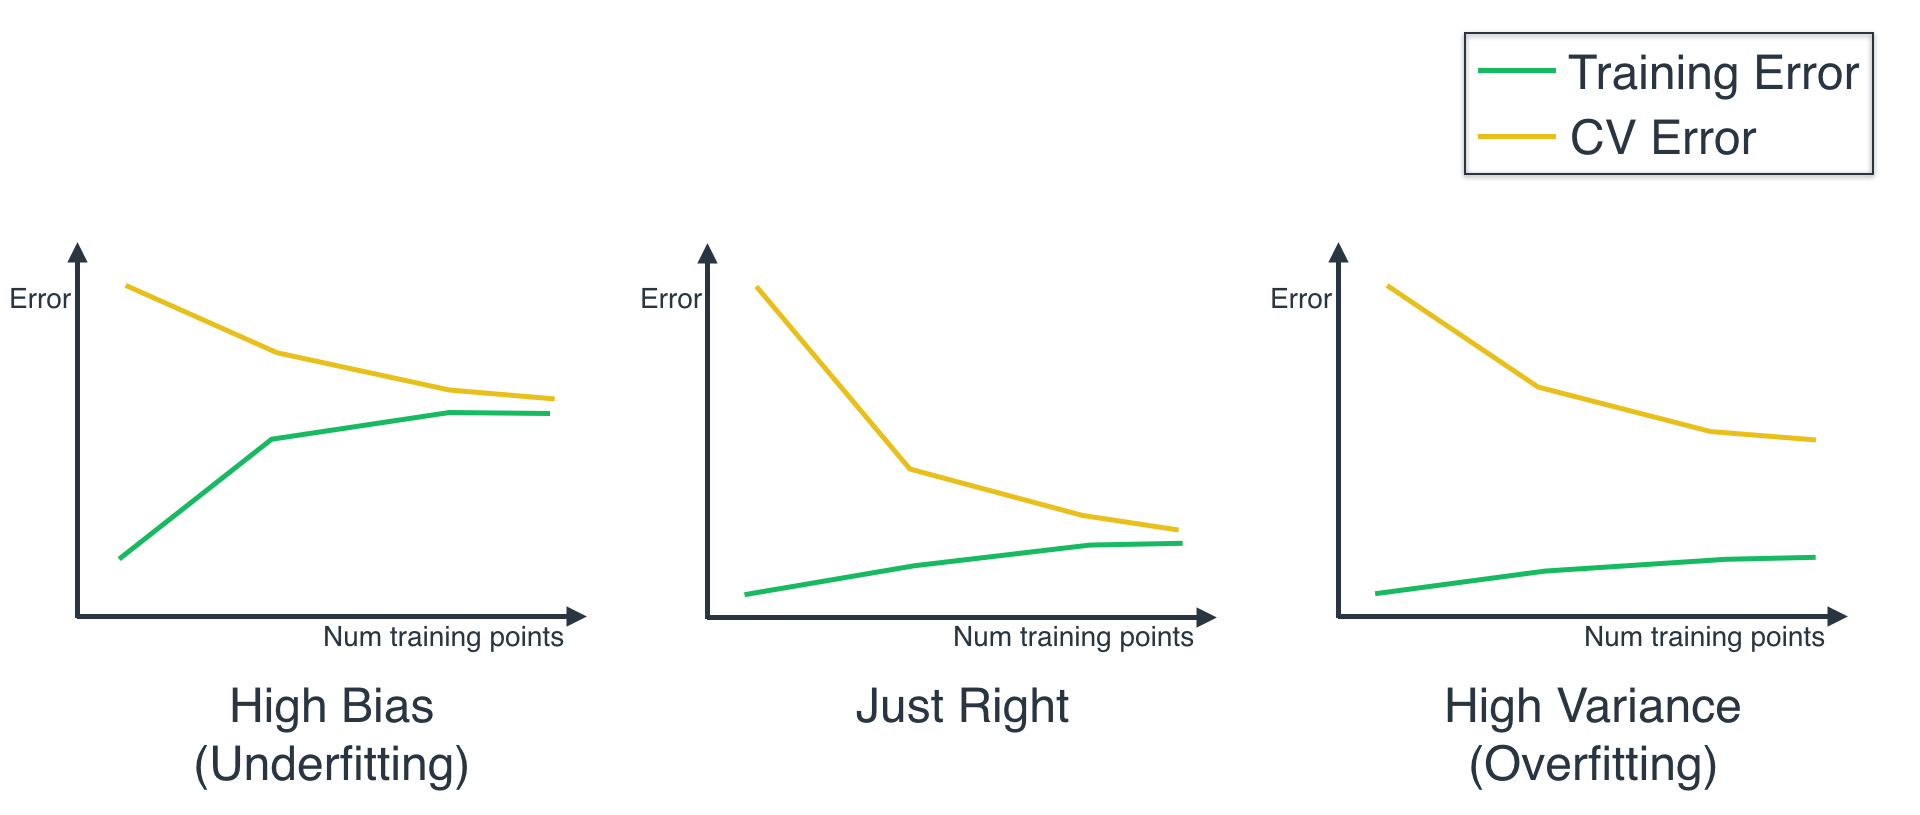

For the first part of the quiz, all you need is to uncomment one of the classifiers, and hit 'Test Run' to see the graph of the Learning Curve. But if you like coding, here are some details. We'll be using the function called learning_curve:

```bash

train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

```

No need to worry about all the parameters of this function (you can read some more in here, but here we'll explain the main ones:

- estimator, is the actual classifier we're using for the data, e.g., LogisticRegression() or GradientBoostingClassifier().
- X and y is our data, split into features and labels.
- train_sizes are the sizes of the chunks of data used to draw each point in the curve.
- train_scores are the training scores for the algorithm trained on each chunk of data.
- test_scores are the testing scores for the algorithm trained on each chunk of data.

## Two very important observations:

- The training and testing scores come in as a list of 3 values, and this is because the function uses 3-Fold Cross-Validation.
- Very important: As you can see, we defined our curves with Training and Testing Error, and this function defines them with Training and Testing Score. These are opposite, so the higher the error, the lower the score. Thus, when you see the curve, you need to flip it upside down in your mind, in order to compare it with the curves above.

## Part 1: Drawing the learning curves

In here, we'll be comparing three models:

- A Logistic Regression model.
- A Decision Tree model.
- A Support Vector Machine model with an rbf kernel, and a gamma parameter of 1000 (this is another type of model, don't worry about how it works for now).

Uncomment the code for each one, and examine the learning curve that gets drawn. If you're curious about the code used to draw the learning curves, it's on the utils.py tab.

In [13]:
# Download dataset
!gdown --id 1X-IfT4Y48ZcSZnTfR0Ez-iTVlbwfIasY
# Download utils file
!gdown --id 1eWyMS2JQHjvBtBvORqNGpIjZMmzfKO5U

Downloading...
From: https://drive.google.com/uc?id=1X-IfT4Y48ZcSZnTfR0Ez-iTVlbwfIasY
To: /content/data.csv
100% 3.61k/3.61k [00:00<00:00, 2.94MB/s]
Downloading...
From: https://drive.google.com/uc?id=1eWyMS2JQHjvBtBvORqNGpIjZMmzfKO5U
To: /content/utils.py
100% 1.10k/1.10k [00:00<00:00, 2.20MB/s]


In [22]:
# utils.py File

from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X, y)

def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

In [ ]:
# Import, read, and split data
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
data = pd.read_csv('data.csv')
import numpy as np
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

### Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# TODO: Uncomment one of the three classifiers, and hit "Test Run"
# to see the learning curve. Use these to answer the quiz below.

### Logistic Regression
#estimator = LogisticRegression()

### Decision Tree
#estimator = GradientBoostingClassifier()

### Support Vector Machine
#estimator = SVC(kernel='rbf', gamma=1000)

# Solution

In [24]:
# Import, read, and split data
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
data = pd.read_csv('data.csv')
import numpy as np
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

### Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# TODO: Uncomment one of the three classifiers, and hit "Test Run"
# to see the learning curve. Use these to answer the quiz below.

### Logistic Regression
#estimator = LogisticRegression()

### Decision Tree
estimator = GradientBoostingClassifier()

### Support Vector Machine
#estimator = SVC(kernel='rbf', gamma=1000)

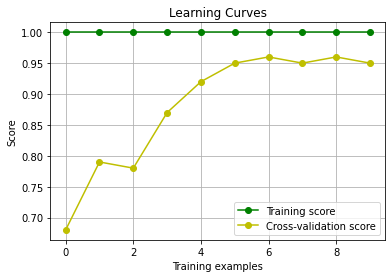

In [25]:
num_trainings = 10
draw_learning_curves(X2, y2, estimator, num_trainings)

Logistic Regression   >>> Underfit


Decision Tree  >>> Just Right


Support Vector Machine  >> Overfit